<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-filip-martin/blob/main/Precomputed_spectograms_256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
import os

# Define paths
input_folder = "./chunks"  # Folder with HDF5 chunks
combined_output_file = "combined_spectrograms.h5"

# Initialize empty lists for spectrograms and labels
all_spectrograms = []
all_labels = []
class_mapping = None  # Placeholder for class mapping

# Read all HDF5 chunk files
for file in os.listdir(input_folder):
    if file.endswith(".h5"):
        chunk_file = os.path.join(input_folder, file)
        with h5py.File(chunk_file, "r") as hf:
            spectrograms = np.array(hf["spectrograms"])
            labels = np.array(hf["labels"])
            all_spectrograms.append(spectrograms)
            all_labels.append(labels)

            # Retrieve class_mapping from the first file
            if class_mapping is None and "class_mapping" in hf.attrs:
                class_mapping = hf.attrs["class_mapping"]

        print(f"Loaded {len(spectrograms)} samples from {file}")

# Concatenate all data
all_spectrograms = np.concatenate(all_spectrograms, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Save combined data to a single HDF5 file, including class_mapping
with h5py.File(combined_output_file, "w") as hf:
    hf.create_dataset("spectrograms", data=all_spectrograms, compression="gzip")
    hf.create_dataset("labels", data=all_labels, compression="gzip")
    if class_mapping:
        hf.attrs["class_mapping"] = class_mapping  # Add class mapping attribute
    hf.attrs["description"] = "Combined spectrogram dataset"

print(f"Combined dataset saved to: {combined_output_file}")
print(f"Total samples: {all_spectrograms.shape[0]}")


Loaded 3000 samples from chunk_1.h5
Loaded 3000 samples from chunk_0.h5
Loaded 3000 samples from chunk_2.h5
Loaded 3000 samples from chunk_3.h5
Combined dataset saved to: combined_spectrograms.h5
Total samples: 12000


In [ ]:
import h5py

# Path to your HDF5 file
file_path = "/content/combined_spectrograms.h5"

# Function to list datasets and attributes
def inspect_hdf5_file(file_path):
    """List all datasets and attributes in an HDF5 file."""
    with h5py.File(file_path, "r") as hf:
        print("\n--- HDF5 File Structure ---")
        def print_hierarchy(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name} | Shape: {obj.shape} | Dtype: {obj.dtype}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")

        # Print all groups and datasets
        hf.visititems(print_hierarchy)

        # Print attributes
        print("\n--- File Attributes ---")
        for attr in hf.attrs:
            print(f"{attr}: {hf.attrs[attr]}")

# Inspect the file
inspect_hdf5_file(file_path)


--- HDF5 File Structure ---
Dataset: labels | Shape: (12000,) | Dtype: int32
Dataset: spectrograms | Shape: (12000, 256, 256) | Dtype: float32

--- File Attributes ---
class_mapping: {'engine': 0, 'speech': 1, 'music': 2}
description: Combined spectrogram dataset


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 127, 127, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 62, 62, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 30, 30, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 256)         │         590,0

 Total params: 14,022,627 (53.49 MB)

 Trainable params: 14,020,195 (53.48 MB)

 Non-trainable params: 2,432 (9.50 KB)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.4486 - loss: 1.6379 - val_accuracy: 0.0000e+00 - val_loss: 2.3937
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.5506 - loss: 1.1312 - val_accuracy: 0.0000e+00 - val_loss: 3.8902
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.5975 - loss: 1.0295 - val_accuracy: 0.0000e+00 - val_loss: 6.8214
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.6103 - loss: 0.9725 - val_accuracy: 0.0050 - val_loss: 7.9629
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.6195 - loss: 0.9198 - val_accuracy: 0.0400 - val_loss: 13.4196
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.6727 - loss: 0.8428 - val_accuracy: 0.0833 - val_loss: 18.2040
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.6340 - loss: 0.8972 - val_accuracy: 0.0717 - val_loss: 28.1944
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7058 - loss: 0.

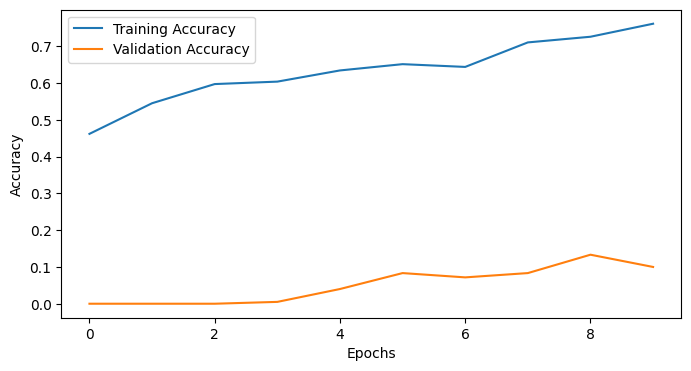

Model saved as 'cnn_classifier_from_hdf5.h5'


In [ ]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Step 1: Define a Custom Data Generator for HDF5 ---
class HDF5DataGenerator(Sequence):
    def __init__(self, h5_file, batch_size, num_classes, input_size=(128, 128), train=True, split=0.8):
        self.h5_file = h5_file
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.input_size = input_size

        # Open HDF5 file and load indices
        with h5py.File(self.h5_file, "r") as hf:
            self.spectrograms = hf["spectrograms"]
            self.labels = hf["labels"]
            total_samples = len(self.labels)

        # Split into train and validation
        split_index = int(total_samples * split)
        if train:
            self.indices = np.arange(0, split_index)
        else:
            self.indices = np.arange(split_index, total_samples)

        np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X = np.zeros((len(batch_indices), *self.input_size, 1), dtype=np.float32)
        y = np.zeros((len(batch_indices), self.num_classes), dtype=np.float32)

        with h5py.File(self.h5_file, "r") as hf:
            for i, idx in enumerate(batch_indices):
                X[i, :, :, 0] = hf["spectrograms"][idx]  # Load spectrogram
                label = hf["labels"][idx]  # Load label
                y[i, label] = 1.0  # One-hot encode label
        return X, y

# --- Step 2: Paths and Generator Initialization ---
h5_file = "./chunks/chunk_0.h5"  # Your HDF5 file containing preprocessed data
batch_size = 16
input_size = (256, 256)
num_classes = 3  # engine, speech, music

train_generator = HDF5DataGenerator(h5_file, batch_size, num_classes, input_size, train=True)
val_generator = HDF5DataGenerator(h5_file, batch_size, num_classes, input_size, train=False)

# --- Step 3: Build the CNN Model ---
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(*input_size, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 4
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# --- Step 4: Train the Model ---
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# --- Step 5: Plot Training History ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# --- Optional: Save the Model ---
model.save("cnn_classifier_from_hdf5.h5")
print("Model saved as 'cnn_classifier_from_hdf5.h5'")

# Optimalizace předchozí sítě

## Optimalizace pro běh na GPU
- přidán JIT a mixed_float16
- h5 file nahrán do paměti

## Optimalizace učení
- Přidán clipnorm pro zabránění exploding gradientu
- Snížen learning rate na 0.0001


Training Data Shape: (2400, 256, 256, 1), (2400, 3)
Validation Data Shape: (600, 256, 256, 1), (600, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_21 (LeakyReLU)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 64, 64, 128)         │             5

 Total params: 17,954,787 (68.49 MB)

 Trainable params: 17,952,355 (68.48 MB)

 Non-trainable params: 2,432 (9.50 KB)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.3758 - loss: 1.4037 - val_accuracy: 0.0000e+00 - val_loss: 12.4459
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4419 - loss: 1.1893 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4767 - loss: 1.0787 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4977 - loss: 0.9993 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5040 - loss: 0.9919 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5429 - loss: 0.9591 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5469 - loss: 0.9144 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5365 -

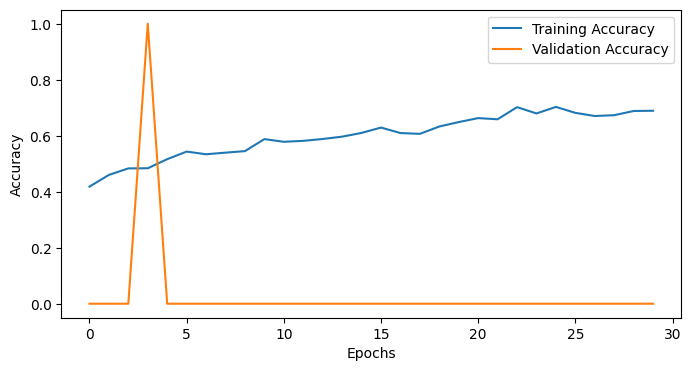

Model saved as 'optimized_cnn_model_in_memory.h5'


In [ ]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# --- Enable Mixed Precision and XLA Compilation ---
mixed_precision.set_global_policy('mixed_float16')  # Use float16 for faster computation
tf.config.optimizer.set_jit(True)  # Enable JIT compilation for TensorFlow graphs

# --- Step 1: Load HDF5 Data into Memory ---
def load_h5_to_memory(h5_file, split=0.8):
    """
    Load HDF5 datasets into memory and split into train and validation sets.
    """
    with h5py.File(h5_file, "r") as hf:
        spectrograms = np.array(hf["spectrograms"], dtype=np.float32) / 255.0  # Normalize
        labels = np.array(hf["labels"], dtype=np.int32)

    # One-hot encode labels
    num_classes = len(np.unique(labels))
    labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

    # Split into train and validation sets
    split_index = int(len(labels) * split)
    X_train, X_val = spectrograms[:split_index], spectrograms[split_index:]
    y_train, y_val = labels[:split_index], labels[split_index:]

    # Add channel dimension for Conv2D input
    X_train = X_train[..., np.newaxis]  # Shape: (samples, 256, 256, 1)
    X_val = X_val[..., np.newaxis]

    return (X_train, y_train), (X_val, y_val)

# Path to HDF5 file
h5_file = "./chunks/chunk_0.h5"
(X_train, y_train), (X_val, y_val) = load_h5_to_memory(h5_file)

print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Validation Data Shape: {X_val.shape}, {y_val.shape}")

# --- Step 2: Define In-Memory Data Generator ---
class InMemoryDataGenerator(Sequence):
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.indices = np.arange(len(self.X))
        np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X_batch = self.X[batch_indices]
        y_batch = self.y[batch_indices]
        return X_batch, y_batch

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# Initialize Data Generators
batch_size = 16
train_generator = InMemoryDataGenerator(X_train, y_train, batch_size)
val_generator = InMemoryDataGenerator(X_val, y_val, batch_size)

# --- Step 3: Build the CNN Model ---
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal',
                  input_shape=(256, 256, 1)),  # Explicit input shape
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),

    # Block 4
    layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(256, kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # num_classes = 3
])

# Compile the model with gradient clipping
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- Step 4: Define Callbacks ---
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Step 5: Train the Model ---
epochs = 30
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[]
)

# --- Step 6: Plot Training History ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# --- Step 7: Save the Model ---
model.save("optimized_cnn_model_in_memory.h5")
print("Model saved as 'optimized_cnn_model_in_memory.h5'")

Results in previous model are strange,
i would expect validation to be at least 1/3 as a random choice


In [ ]:
# Install wandb (if not already installed)
!pip install wandb --quiet

import numpy as np
import h5py
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import wandb
from wandb.integration.keras import WandbMetricsLogger
# Initialize wandb
wandb.init(project="cnn_spectrogram_classifier", config={
    "epochs": 10,
    "batch_size": 16,
    "input_size": (256, 256),
    "num_classes": 3,
    "learning_rate": 0.001
})

# --- Step 1: Define a Custom Data Generator for HDF5 ---
class HDF5DataGenerator(Sequence):
    def __init__(self, h5_file, batch_size, num_classes, input_size=(256, 256), train=True, split=0.9):
        self.h5_file = h5py.File(h5_file, "r")  # Open file once
        self.spectrograms = self.h5_file["spectrograms"]
        self.labels = self.h5_file["labels"]
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.input_size = input_size

        # Split into train and validation indices
        total_samples = len(self.labels)
        split_index = int(total_samples * split)

        if train:
            self.indices = np.arange(0, split_index)
            np.random.shuffle(self.indices)  # Shuffle only training indices
        else:
            self.indices = np.arange(split_index, total_samples)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X = np.zeros((len(batch_indices), *self.input_size, 1), dtype=np.float32)
        y = np.zeros((len(batch_indices), self.num_classes), dtype=np.float32)

        for i, idx in enumerate(batch_indices):
            X[i, :, :, 0] = self.spectrograms[idx]
            label = self.labels[idx]
            y[i, label] = 1.0  # One-hot encode the labels

        return X, y

    def __del__(self):
        self.h5_file.close()


# --- Step 2: Paths and Generator Initialization ---
h5_file = "./chunks/chunk_0.h5"
batch_size = 16
input_size = (256, 256)
num_classes = 3

train_generator = HDF5DataGenerator(h5_file, batch_size, num_classes, input_size, train=True)
val_generator = HDF5DataGenerator(h5_file, batch_size, num_classes, input_size, train=False)

# --- Step 3: Build the CNN Model ---
model = models.Sequential([
    layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same', input_shape=(*input_size, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks: Reduce learning rate and Wandb
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
wandb_logger = WandbMetricsLogger()

# --- Step 4: Train the Model ---
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[lr_scheduler, wandb_logger]
)

# --- Step 5: Save the Model ---
model.save("cnn_classifier_saved_model", save_format="tf")  # TensorFlow format
wandb.save("cnn_classifier_saved_model")

# --- Step 6: Plot Training History ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Model saved locally and logged to wandb.")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: fsirc (fsirc-czech-technical-university-in-prague). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 4,293,443 (16.38 MB)

 Trainable params: 4,292,707 (16.38 MB)

 Non-trainable params: 736 (2.88 KB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


169/169 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.4132 - loss: 1.3214 - val_accuracy: 0.0000e+00 - val_loss: 3.1093 - learning_rate: 0.0010
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.4930 - loss: 1.0654 - val_accuracy: 0.0000e+00 - val_loss: 5.1827 - learning_rate: 0.0010
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.5167 - loss: 0.9895 - val_accuracy: 0.0000e+00 - val_loss: 90.9099 - learning_rate: 0.0010
Epoch 4/10
162/169 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5797 - loss: 0.9255
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
169/169 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.5799 - loss: 0.9252 - val_accuracy: 0.0000e+00 - val_loss: 447.8531 - learning_rate: 0.0010
Epoch 5/10
 36/169 ━━━━━━━━━━━━━━━━━━━━ 4:49 2s/step - accuracy: 0.6303 - loss: 0.8072

KeyboardInterrupt: 

In [ ]:
# Install wandb (if not already installed)
!pip install wandb --quiet

import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import mixed_precision
import matplotlib.pyplot as plt
import wandb
from wandb.integration.keras import WandbMetricsLogger

# Enable mixed precision and XLA compilation
mixed_precision.set_global_policy('mixed_float16')
tf.config.optimizer.set_jit(True)

# Initialize wandb
wandb.init(project="cnn_spectrogram_classifier", config={
    "epochs": 10,
    "batch_size": 128,
    "input_size": (256, 256),
    "num_classes": 3,
    "learning_rate": 0.0005
})

# --- Step 1: Define the HDF5 Data Generator ---
class HDF5DataGenerator:
    def __init__(self, h5_file, batch_size, num_classes, input_size=(256, 256), train=True, split=0.8):
        self.h5_file_path = h5_file
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.input_size = input_size

        # Open the HDF5 file to calculate indices
        with h5py.File(h5_file, "r") as h5_file:
            self.spectrograms = h5_file["spectrograms"]
            self.labels = h5_file["labels"]
            total_samples = len(self.labels)
            split_index = int(total_samples * split)

        self.train_indices = np.arange(0, split_index) if train else np.arange(split_index, total_samples)
        if train:
            np.random.shuffle(self.train_indices)

    def __len__(self):
        """
        Returns the total number of batches per epoch.
        """
        return len(self.train_indices) // self.batch_size

    def __call__(self):
        """
        Yields batches of data without re-opening the HDF5 file.
        Efficiently handles chunked datasets.
        """
        with h5py.File(self.h5_file_path, "r") as h5_file:
            spectrograms = h5_file["spectrograms"]
            labels = h5_file["labels"]
            for i in range(0, len(self.train_indices), self.batch_size):
                batch_indices = self.train_indices[i:i + self.batch_size]
                X = np.zeros((len(batch_indices), *self.input_size, 1), dtype=np.float32)
                y = np.zeros((len(batch_indices), self.num_classes), dtype=np.float32)

                for j, idx in enumerate(batch_indices):
                    # Resize spectrogram if necessary
                    spectrogram = spectrograms[idx]
                    if spectrogram.shape != self.input_size:
                        spectrogram = tf.image.resize(spectrogram, self.input_size)
                    X[j, :, :, 0] = spectrogram.astype(np.float32) / 255.0  # Normalize to [0, 1]
                    y[j] = tf.keras.utils.to_categorical(labels[idx], self.num_classes)

                yield X, y

# --- Step 2: Wrap Data Generators into tf.data.Dataset ---
def get_tf_dataset(generator, batch_size):
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            tf.TensorSpec(shape=(batch_size, *input_size, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(batch_size, num_classes), dtype=tf.float32),
        )
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Initialize datasets
h5_file = "./chunks/chunk_0.h5"  # Path to your HDF5 file (adjust if needed)
batch_size = 128
input_size = (256, 256)
num_classes = 3

train_generator = HDF5DataGenerator(h5_file, batch_size, num_classes, input_size, train=True)
val_generator = HDF5DataGenerator(h5_file, batch_size, num_classes, input_size, train=False)

train_dataset = get_tf_dataset(train_generator, batch_size)
val_dataset = get_tf_dataset(val_generator, batch_size)

# --- Step 3: Build the CNN Model ---
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same', input_shape=(256, 256, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),  # Efficient pooling instead of Flatten
    layers.Dense(128, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks: Reduce learning rate, early stopping, and Wandb
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
wandb_logger = WandbMetricsLogger()

# --- Step 4: Train the Model ---
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[lr_scheduler, early_stopping, wandb_logger]
)

# --- Step 5: Save the Model ---
model.save("cnn_classifier_saved_model", save_format="tf")
wandb.save("cnn_classifier_saved_model")

# --- Step 6: Plot Training History ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Model saved locally and logged to wandb.")


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 256, 256, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 256, 256, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_41 (Activation)           │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 128)                 │             5

 Total params: 115,523 (451.26 KB)

 Trainable params: 114,787 (448.39 KB)

 Non-trainable params: 736 (2.88 KB)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_32" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 128, 256, 256)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 256, 256, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
import h5py

def display_h5_params(h5_file_path):
    # Open the HDF5 file
    with h5py.File(h5_file_path, 'r') as h5_file:
        # Iterate over all datasets in the HDF5 file
        for dataset_name in h5_file:
            dataset = h5_file[dataset_name]
            print(f"Dataset name: {dataset_name}")
            print(f"Shape: {dataset.shape}")
            print(f"Datatype: {dataset.dtype}")
            print(f"Number of elements: {dataset.size}")
            print(f"Chunks: {dataset.chunks}")
            print(f"Compression: {dataset.compression}")
            print(f"Compression level: {dataset.compression_opts}")
            print(f"Attributes: {dict(dataset.attrs)}")
            print("-" * 50)

# Example usage
h5_file_path = "./chunks/chunk_0.h5"  # Path to your HDF5 file
display_h5_params(h5_file_path)


Dataset name: labels
Shape: (3000,)
Datatype: int32
Number of elements: 3000
Chunks: (3000,)
Compression: gzip
Compression level: 4
Attributes: {}
--------------------------------------------------
Dataset name: spectrograms
Shape: (3000, 256, 256)
Datatype: float32
Number of elements: 196608000
Chunks: (94, 16, 16)
Compression: gzip
Compression level: 4
Attributes: {}
--------------------------------------------------


In [ ]:
# Install wandb (if not already installed)
!pip install wandb --quiet

import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import mixed_precision
import matplotlib.pyplot as plt
import wandb
from wandb.integration.keras import WandbMetricsLogger

# Enable mixed precision and XLA compilation
mixed_precision.set_global_policy('mixed_float16')
tf.config.optimizer.set_jit(True)

# Initialize wandb
wandb.init(project="cnn_spectrogram_classifier", config={
    "epochs": 10,
    "batch_size": 128,
    "input_size": (256, 256),
    "num_classes": 3,
    "learning_rate": 0.0005
})

# --- Step 1: Load HDF5 Dataset into RAM ---
def load_h5_to_memory(h5_file_path, split=0.8):
    """
    Loads the HDF5 file into memory as NumPy arrays for both training and validation sets.
    """
    with h5py.File(h5_file_path, "r") as h5_file:
        spectrograms = np.array(h5_file["spectrograms"], dtype=np.float32) / 255.0  # Normalize [0, 1]
        labels = np.array(h5_file["labels"], dtype=np.int32)

    # One-hot encode labels
    num_classes = len(np.unique(labels))
    labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

    # Split data into training and validation sets
    split_index = int(len(labels) * split)
    X_train, X_val = spectrograms[:split_index], spectrograms[split_index:]
    y_train, y_val = labels[:split_index], labels[split_index:]

    # Reshape to include channel dimension
    X_train = X_train[..., np.newaxis]  # Shape: (samples, 256, 256, 1)
    X_val = X_val[..., np.newaxis]

    return (X_train, y_train), (X_val, y_val)

# Load dataset into RAM
h5_file_path = "./chunks/chunk_0.h5"
(X_train, y_train), (X_val, y_val) = load_h5_to_memory(h5_file_path)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")

# --- Step 2: Build the CNN Model ---
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same', input_shape=(256, 256, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),  # Efficient pooling instead of Flatten
    layers.Dense(128, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # num_classes = 3
])

# Compile the model
optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks: Reduce learning rate, early stopping, and Wandb
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
wandb_logger = WandbMetricsLogger()

# --- Step 3: Train the Model ---
batch_size = 128
epochs = 10

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[lr_scheduler, early_stopping, wandb_logger]
)

# --- Step 4: Save the Model ---
model.save("cnn_classifier_saved_model", save_format="tf")
wandb.save("cnn_classifier_saved_model")

# --- Step 5: Plot Training History ---
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Model saved locally and logged to wandb.")


Training set shape: (2400, 256, 256, 1), (2400, 3)
Validation set shape: (600, 256, 256, 1), (600, 3)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 256, 256, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 256, 256, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_55 (Activation)           │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_56 (Activation)           │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_57 (Activation)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_58 (Activation)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 128)                 │             5

 Total params: 115,523 (451.26 KB)

 Trainable params: 114,787 (448.39 KB)

 Non-trainable params: 736 (2.88 KB)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 851ms/step - accuracy: 0.3881 - loss: 1.5146 - val_accuracy: 0.0000e+00 - val_loss: 1.4110 - learning_rate: 5.0000e-04
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4236 - loss: 1.3355 - val_accuracy: 0.0000e+00 - val_loss: 1.7033 - learning_rate: 5.0000e-04
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4360 - loss: 1.2813 - val_accuracy: 0.0000e+00 - val_loss: 2.1873 - learning_rate: 5.0000e-04
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4140 - loss: 1.2565
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4151 - loss: 1.2561 - val_accuracy: 0.0000e+00 - val_loss: 2.8138 - learning_rate: 5.0000e-04
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4510 - loss: 1.2344 - val_accuracy: 0.0000e+00 - val_loss: 3.5582 - learning_rate: 2.5000e-04
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - 

ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf